# Visualizing planar flow
Visualizing the behavior of planar flow: $$f(z) = z + u \tanh(w^T z + b),$$ as proposed in
* Rezende, Danilo Jimenez, and Shakir Mohamed. "Variational inference with normalizing flows." arXiv preprint arXiv:1505.05770 (2015).

author: Yuanjun Gao, 09/25/2016

In [2]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
def h(x):
    return np.tanh(x)

def h_prime(x):
    return 1 - np.tanh(x) ** 2

def f(z, w, u, b):
    return z + np.dot(h(np.dot(z, w) + b).reshape(-1,1), u.reshape(1,-1))

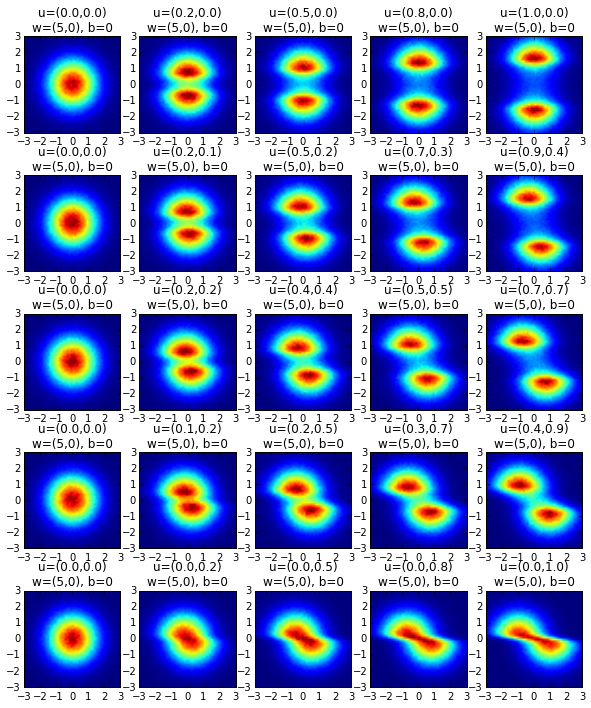

In [17]:
plt.figure(figsize=[10,12])

id_figure = 1
for i in np.arange(5):
    for j in np.arange(5):
        theta_w = 0 #represent w and u in polar coordinate system
        rho_w = 5
        theta_u = np.pi / 8 * i
        rho_u = j / 4.0
        w = np.array([np.cos(theta_w),np.sin(theta_w)]) * rho_w
        u = np.array([np.cos(theta_u),np.sin(theta_u)]) * rho_u
        b = 0
        grid_use = np.meshgrid(np.arange(-1,1,0.001), np.arange(-1,1,0.001))
        z = np.concatenate([grid_use[0].reshape(-1,1), grid_use[1].reshape(-1,1)], axis=1)
        z = np.random.normal(size=(int(1e6),2))
        z_new = f(z, w, u, b)

        heatmap, xedges, yedges = np.histogram2d(z_new[:,0], z_new[:,1], bins=50, 
                                                 range=[[-3,3],[-3,3]])
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

        plt.subplot(5,5,id_figure)
        plt.imshow(heatmap, extent=extent)
        plt.title("u=(%.1f,%.1f)"%(u[0],u[1]) + "\n" +
                  "w=(%d,%d)"%(w[0],w[1]) + ", " + "b=%d"%b)
        id_figure += 1
        
        plt.xlim([-3,3])
        plt.ylim([-3,3])

plt.savefig('planar_flow.jpg')